#stages: 13


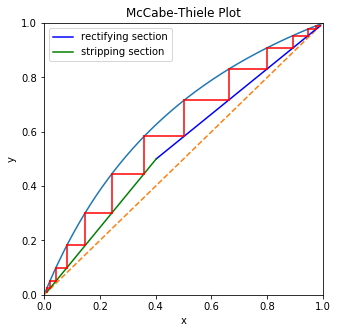

In [24]:
import numpy as np
import scipy
from scipy.optimize import fsolve
import matplotlib 
from matplotlib import pyplot
%matplotlib inline

a = 2.5
zf = 0.5  # feed
xd = 0.99  # distillate
xb = 0.01 # bottom

q = 0 # thermal ratio

R = 5 # reflux ratio, R = Lr/D 

F = 100 # kmol/hr

def dbf(f):
    # solve for D and B
    return [xd*f[0] + xb*f[1] - zf*F, f[0]+f[1]-F]
[D,B]=fsolve(dbf,[30,20])

Lr = R*D
Ls = Lr + q*F
Vr = Lr + D
Vs = Vr + (q-1)*F

def x_eq(x):
    # x on the equlibrium curve
    return x/(a*(1-x) + x)

def rec_opline(x):
    # rectifying section operating line: y = (Lr/Vr)*x + (D*xd/Vr)
    return (Lr/Vr)*x + (D*xd/Vr)

def strip_opline(x):
    # stripping section operating line: y = (Ls/Vs)*x - (B*xb/Vs)
    return (Ls/Vs)*x - (B*xb/Vs)

# intersection point of rectifying opline and stripping opline
def inter_pt(p):
    return [(Lr/Vr)*p[0] + (D*xd/Vr) - p[1], (Ls/Vs)*p[0] - (B*xb/Vs) - p[1]]
[xq,yq]=fsolve(inter_pt, [0.5,0.5])

# y-x equilibrium curve
x = np.linspace(0,1,10000)
y = a*x/(1 + x*(a-1))
pyplot.figure(figsize=(5,5))
pyplot.title("McCabe-Thiele Plot")
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x,y)
pyplot.plot(x,x,'--')
pyplot.xlim(0,1)
pyplot.ylim(0,1)
# rectifying section operating line
x, y = [xq,xd],[yq,xd]
pyplot.plot(x,y,label='rectifying section',color='b')
# stripping section operating line
x, y = [xq,xb],[yq,xb]
pyplot.plot(x,y,label='stripping section',color='g')
pyplot.legend(loc = 'best')

x0, y0 = xd, xd
for i in range(1,1000):
    x1, y1 = x_eq(y0), y0
    pyplot.plot([x0,x1],[y0,y1],color='r')
    if x1 > xq:
        x2, y2 = x1, rec_opline(x1)
    if x1 < xq:
        x2, y2 = x1, strip_opline(x1)
    if (x2, y2) < (xb, xb):
        pyplot.plot([x1,x2],[y1,x2],color='r')
    else: pyplot.plot([x1,x2],[y1,y2],color='r')
    x0, y0 = x2, y2
    if y2<x2:
        break

if i == 999:
    print('#stages: ','inf')
else: print('#stages:',i)



#stages: 4


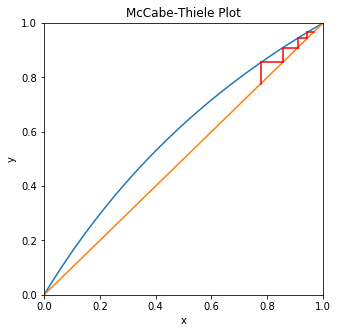

In [1]:
###### MCCABE THIELE PLOTS FOR TOTAL REFLUX CONDITIONS 

import numpy as np
import scipy
from scipy.optimize import fsolve
import matplotlib 
from matplotlib import pyplot
%matplotlib inline

a = 1.69
zf = 0.75  # feed
xd = 0.96  # distillate
xb = 0.74 # bottom

q = 1 # thermal ratio

R = 5 # reflux ratio, R = Lr/D 

F = 100 # kmol/hr

def dbf(f):
    # solve for D and B
    return [xd*f[0] + xb*f[1] - zf*F, f[0]+f[1]-F]
[D,B]=fsolve(dbf,[30,20])

Lr = R*D
Ls = Lr + q*F
Vr = Lr + D
Vs = Vr + (q-1)*F

def x_eq(x):
    # x on the equlibrium curve
    return x/(a*(1-x) + x)

def rec_opline(x):
    # rectifying section operating line: y = (Lr/Vr)*x + (D*xd/Vr)
    return x

def strip_opline(x):
    # stripping section operating line: y = (Ls/Vs)*x - (B*xb/Vs)
    return x

# intersection point of rectifying opline and stripping opline
def inter_pt(p):
    return [(Lr/Vr)*p[0] + (D*xd/Vr) - p[1], (Ls/Vs)*p[0] - (B*xb/Vs) - p[1]]
[xq,yq]=[zf,zf]

# y-x equilibrium curve
x = np.linspace(0,1,10000)
y = a*x/(1 + x*(a-1))
pyplot.figure(figsize=(5,5))
pyplot.title("McCabe-Thiele Plot")
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x,y)
pyplot.plot(x,x)
pyplot.xlim(0,1)
pyplot.ylim(0,1)

x0, y0 = 0.966, 0.966
xb = 0.791
for i in range(1,1000):
    x1, y1 = x_eq(x0), x0
    pyplot.plot([x0,x1],[y0,y1],color='r')
    x2, y2 = x1, x1
    pyplot.plot([x1,x2],[y1,x2],color='r')
    x0, y0 = x2, y2
    if x2<xb:
        break

if i == 999:
    print('#stages: ','inf')
else: print('#stages:',i)

pyplot.savefig('mccabe-thiele.png',dpi=1000)

